In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import pynance as py

In [15]:
df = pd.read_csv("../data/yfinance_data/Data/AAPL.csv")

In [16]:
df = df.sort_values("Date")
df = df.set_index('Date')

### some visulaizations

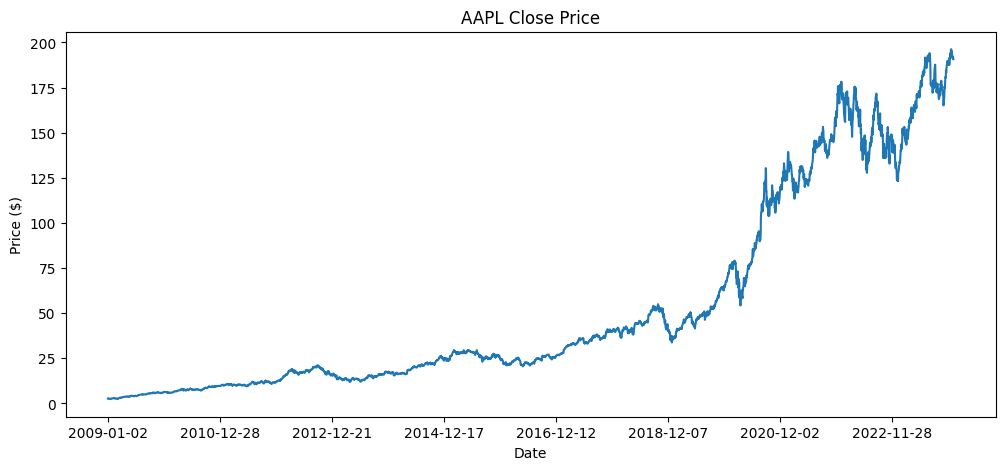

In [17]:
df['Close'].plot(figsize=(12, 5),title="AAPL Close Price")
plt.ylabel("Price ($)")
plt.show()

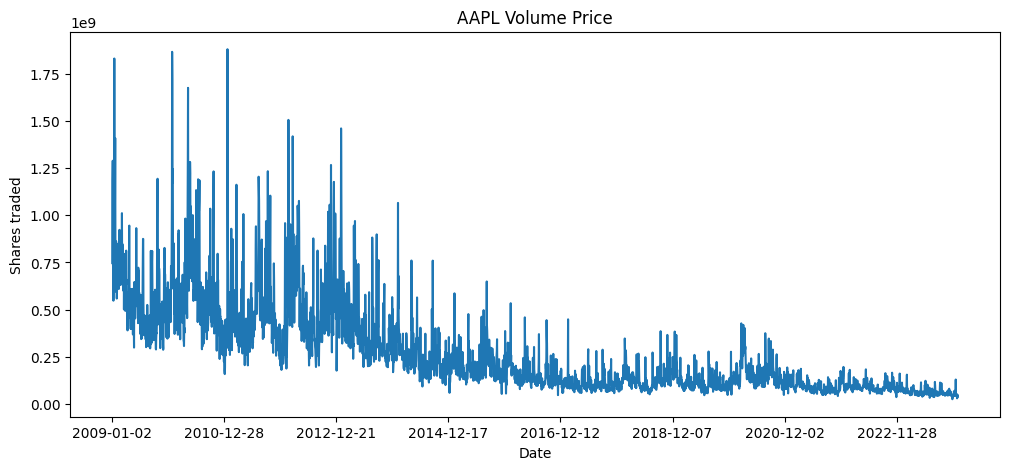

In [19]:
df['Volume'].plot(figsize=(12, 5), title="AAPL Volume Price")
plt.ylabel("Shares traded")
plt.show()

### Calculate the Relative Strength Index (RSI)

In [32]:
close_prices = df['Close'].values

In [33]:
rsi_14 = talib.RSI(close_prices, timeperiod=14)
df['RSI'] = rsi_14

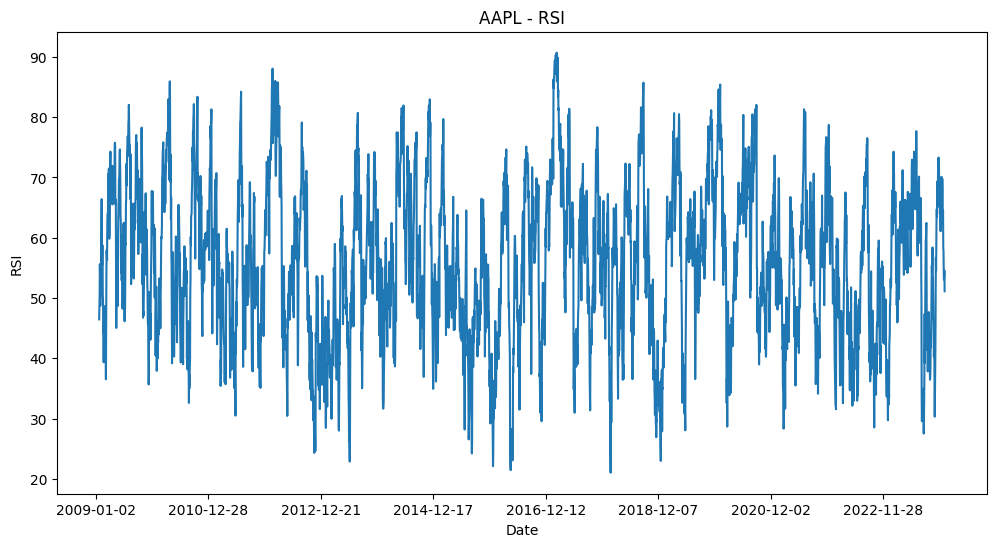

In [36]:
df['RSI'].plot(figsize=(12,6), title="AAPL - RSI")
plt.ylabel("RSI")
plt.show()

### Calculate the Simple Moving Average (SMA)

In [20]:
df['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
df['SMA_50']= talib.SMA(close_prices, timeperiod=50)

In [21]:
print(df.tail(20))

                 Close        High         Low        Open     Volume  \
Date                                                                    
2023-12-01  189.450836  189.767835  187.459631  188.549346   45704800   
2023-12-04  187.657761  188.271970  185.696289  188.202618   43389500   
2023-12-05  191.610458  192.581286  188.400765  188.430498   66628400   
2023-12-06  190.520752  192.937912  190.312710  192.630814   41089700   
2023-12-07  192.452499  193.175666  191.778853  191.818488   47477700   
2023-12-08  193.879013  194.156392  191.858090  192.383130   53406400   
2023-12-11  191.372681  191.679793  189.629152  191.303343   60943700   
2023-12-12  192.888382  192.898283  189.926350  191.273627   52696900   
2023-12-13  196.107956  196.147575  193.027051  193.264796   70404200   
2023-12-14  196.256592  197.752460  194.324838  196.167437   66831600   
2023-12-15  195.721619  196.543840  195.156944  195.681984  128538400   
2023-12-18  194.057343  194.790425  192.571376  194

### plot the SMA

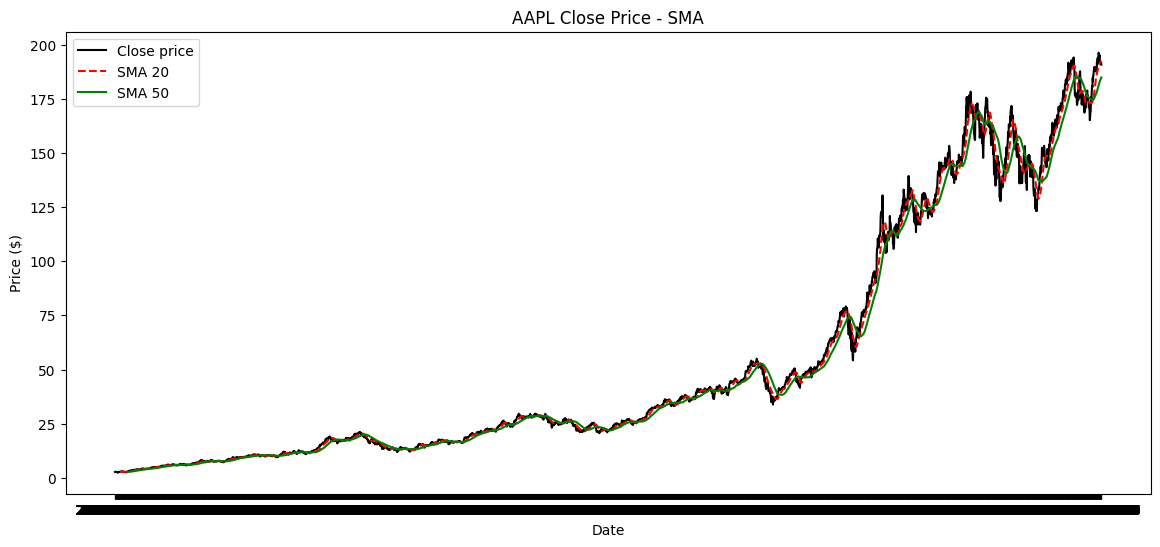

In [27]:
fix, ax = plt.subplots(figsize=(14, 6))

ax.plot(df.index, df['Close'], label="Close price", color='black')
ax.plot(df.index, df['SMA_20'], label="SMA 20", color='red', linestyle='--')
ax.plot(df.index, df['SMA_50'], label="SMA 50", color='green', linestyle='-')

ax.set_title("AAPL Close Price - SMA")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
plt.legend()
plt.show()

### calculate the MACD line

In [29]:
MACD_Line, signal_line, hist = talib.MACD(close_prices,12, 26, 9)
df['MACD_Line'] = MACD_Line
df['Signal_Line'] = signal_line
df['Hist'] = hist

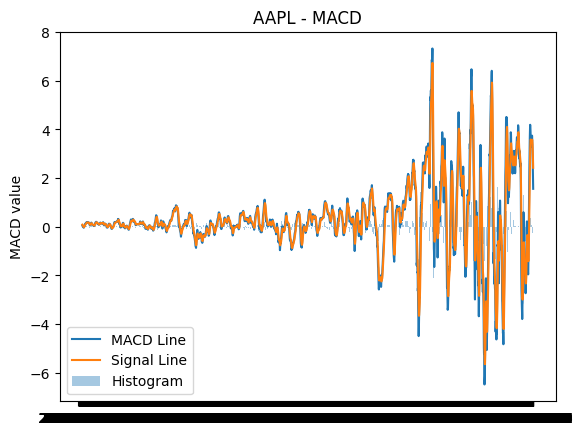

In [31]:
fig, ax = plt.subplots()

ax.plot(df.index, df['MACD_Line'], label='MACD Line')
ax.plot(df.index, df['Signal_Line'], label='Signal Line')
ax.bar(df.index, df['Hist'], alpha=0.4, label='Histogram')

ax.set_ylabel("MACD value")
ax.set_title("AAPL - MACD")
ax.legend()
plt.show()